# Supply of SLP client portfolio with renewable energies

## 1. Introduction

### 1.1 Background, significance and goals

Renewable energy sources, such as solar and wind, have emerged as pivotal contributors to the energy transition. In the pursuit of sustainable energy practices, the integration of renewable energy into suppliers' energy portfolio presents both, an environmental imperative and a strategic business opportunity. In the context of energy suppliers catering to household clients, this data analysis project aims to explore the complexities and challenges associated with incorporating variable renewable energies into the supply of a standard load profile (SLP) portfolio. The focus lies with the intricate relationship between the variable production profile of renewable energy power plants and the distinctive load profile of household SLP clients. Unlike conventional energy sources, renewable energy production is inherently influenced by natural factors, resulting in variations that may not always align with the seasonal and diurnal consumption patterns of households.

The project aims to demonstrate that the production profile is significantly influenced by the choice of specific technologies, with the composition of power plants affecting its compatibility with the load profile of SLP clients. Thereby, one of the central challenges addressed in this project is the necessity for consumption to mirror production. The analysis will unravel the complexities of achieving this balance and illustrate how potential discrepancies can be managed. By showcasing the dynamics between renewable energy production and household consumption, this project aims to offer key insights to guide strategic decision-makers at energy suppliers. The findings will contribute to the formulation of effective strategies for optimizing the integration of renewable energy sources into the electricity supply chain, ensuring both environmental sustainability and operational efficiency.

### 1.2 General conditions and limitations  

The data analysis project spans the entirety of the year 2023, offering a comprehensive understanding of how the energy production and consumption patterns vary throughout a year with different seasons and under varying weather conditions. Fluctuations between different years and over the course of an entire project term are not taken into account here, but are part of a thorough analysis. Therefore, this analysis cannot be used as a basis for dimensioning a renewable energy system or PPA contract. The results are merely intended to highlight the discrepancies that can arise between generation and consumption and which aspects need to be considered when selecting technologies. 

The energy supplier has the choice of building its own generation plants or purchasing electricity from renewable energies via Power Purchase Agreements (PPAs). In this project, it is assumed that the energy supplier concludes a PPA with a 10 MW power plant to supply part of its 35 GWh household SLP portfolio with renewable energies. 

#### Power purchase agreement:

As the project is only carried out on the basis of publicly available data, the generation profile of a 10 MW plant is derived in simplified form from the historical generation of the total generation capacity in Germany. The project accounts for a mix of renewable energy technologies commonly employed in the industry, namely wind power (onshore and offshore) and solar photovoltaic (PV). The selected technologies are assessed for their respective production profiles with regards to weather conditions such as sunshine availability or wind patterns. It must be pointed out that the generation profile of a system is very individual and strongly dependent on local weather and site conditions. The chosen approach comes with the limitation that these geographical conditions cannot be mapped. Therefore, results for individual plants may deviate even more strongly compared to the downscaled data.

#### Standard load profile: 

The household SLP portfolio under consideration represents a total annual consumption of 35 gigawatt-hours (GWh) and is derived from an exemplary standard load profile profile that is based on the quarter-hourly output values for an annual consumption of 1,000 kWh/a. Other SLP customer types that are usually part of an energy supplier's SLP portfolio, such as commercials or public buildings, are not taken into account here. The focus is solely on household customers, whose energy generation profile is especially susceptible to fluctuations due to diurnal and seasonal variations.  

### 1.3 Data and structure 

The analysis, relying only on publicly available data, is broadly structured into three distinct parts:

#### Part 1: Creation and visualisation of an annual load profile for a 35 GWh SLP portfolio of household customers  
An annual load profile is generated and visualized, capturing the total energy demand of a 35 GWh SLP portfolio of household customers for the year 2023. This profile is derived from a representative Standard Load Profile (SLP) for power, accessible via the BDEW website. 

Data source(s): 
- BDEW provides a representative power standard load profile for households
- https://www.bdew.de/energie/standardlastprofile-strom/

#### Part 2: Derivation of generation profiles for a 10 MW power plant exploring multiple technologies
Exemplary generation profiles for a 10 MW power plant are derived exploring multiple renewable energy technologies - namely solar photovoltaic (PV) and wind power (offshore and onshore). To achieve this, historical data on the actual energy generation from renewable plants, along with information on installed generation capacity, are used to downscale national energy output to the desired plant size. 

Data source(s): 
- SMARD provides the historical actual generation of renewable energy plants in Germany as well as the installed generation capacity
- https://www.smard.de/en/downloadcenter/download-market-data/?downloadAttributes=%7B%22selectedCategory%22:1,%22selectedSubCategory%22:1,%22selectedRegion%22:false,%22selectedFileType%22:false,%22from%22:1705359600000,%22to%22:1706309999999%7D

#### Part 3: Comparison of the household load profile with the various generation profiles
The household load profile generated in Part 1 is juxtaposed with the various generation profiles derived in Part 2. This comparative analysis aims to identify alignment and divergence points, highlighting periods of surplus or deficit in renewable energy production against the background of the household consumption patterns. 

## 2. Implementation 

### Preparatory settings 

In [8]:
## Import of all necessary libraries 

# for numerical calculations and operations with multi-dimensional arrays and matrices 
import pandas as pd 
# for data manipulation and -analysis - particularly suitable for data in tabellaric form   
import numpy as np 
# for the creation of stastistical, interactive and animated visualisations 
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.dates import HourLocator, DateFormatter
from matplotlib.gridspec import GridSpec
# for the improved visualisation and representation of statistical models 
import seaborn as sns 
# for the representation of dates, times and intervals and performing operations on them 
from datetime import datetime, timedelta 
# for showing what files are stored in the directories 
import os
import warnings 
warnings.filterwarnings('ignore')

In [10]:
## Check whether all the necessary raw data is uploaded 

# Find out the current workin directory 
print("Current working directory:", os.getcwd())

# Print all the files in the current working directory 
current_directory_rawdata = '/Users/kathringreilmeier/BewerbungsportfolioDatenanalyse/RawData'
files_in_directory_rawdata = os.listdir(current_directory_rawdata)

print(files_in_directory_rawdata)

Current working directory: /Users/kathringreilmeier/BewerbungsportfolioDatenanalyse/WorkFiles
['representative_hh_profile.csv', 'Installierte_Erzeugungsleistung_202204180000_202404180000_Jahr.csv', 'Installed_generation_capacity_2023_Quarterhour.csv', 'Actual_generation_2023_Quarterhour.csv', '.ipynb_checkpoints', 'Day-ahead_prices_2023_Quarterhour.csv']


### Analysis 

### 2.1 Creation and visualization of an annual load profile for a 35 GWh portfolio of household customers 

#### 2.1.1 Set up calendar of investigated time period 

In [15]:
## Set up investigated time range 

# Define the start and end date of the desired time range  
# Define the displayed steps of the time range 
start_date = '2023-01-01'
end_date = '2023-12-31'
date_range = pd.date_range(start = start_date, end = end_date, freq = 'D')

# Create a list with dates for time range 
date_list = date_range.strftime('%Y-%m-%d').tolist()

# Print date list (Alternative a) 
print(date_list[:5])

# Print date list (Alternative b) 
for date in date_list[:5]:
    print(date)

['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05']
2023-01-01
2023-01-02
2023-01-03
2023-01-04
2023-01-05


In [17]:
## Leap year check 

# Define the conditions that must apply for a leap year  
# Condition 1: a year is a leap year if it is dividible by 4
# Condition 2: a year is no leap year if it is dividible by 100
# Condition 3: a year is a leap year if it is dividible by 400

def is_leap_year(year): 
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0) 

# Check whether the investigated year is a leap year 
year_to_check = 2023

if is_leap_year(year_to_check):
    print(f"{year_to_check} is a leap year")
else: 
    print(f"{year_to_check} is not a leap year")


2023 is not a leap year


In [19]:
## Add columns to enumerate the dates and specify the day of the week 

# Create a new list to store day numbers (consecutive starting from 1) 
day_numbers = list(range(1, len(date_list) + 1)) 

# Create a new list to store day names 
day_names = []

# Iterate over each date and get the day of the week 
for date_string in date_list:
    # Parse the date string to a datetime object 
    date_object = datetime.strptime(date_string, "%Y-%m-%d")
    # Get the day name (Monday to Sunday) 
    day_name = date_object.strftime("%A") 
    day_names.append(day_name) 
    
# Combine the lists into a dictionary 
# The dictionary contains three keys representing the information associated with each date 
# The zip-function is used to to combine elements from the three lists into tuples, with each tuple containing corresponding elements from the three lists 
# The list comprehension iterates over these tuples, and for each tuple, a dictionary is created 
full_calendar = [{"Date": date, "DayNumber": day_number, "DayName": day_name}
                 for date, day_number, day_name in zip(date_list, day_numbers, day_names)]

In [21]:
## Add a column to specify whether it is a weekday, a weekend-day or a public holiday 
## Only national public holidays have been considered - public holidays specific to the individual Bundesländer were neglected

# Convert the dictionary into a data frame 
df_day_classification = pd.DataFrame(full_calendar) 

# Convert the date strings to datetime objects 
df_day_classification['Date'] = pd.to_datetime(df_day_classification['Date'])

# Define specific public holidays that should be considered as Saturdays or Sundays and convert them into a datetime format 
special_saturdays = pd.to_datetime(['2023-12-24','2023-12-31'])
special_sundays = pd.to_datetime(['2023-01-01','2023-04-07','2023-04-10','2023-05-01','2023-05-18','2023-05-29','2023-10-03','2023-12-25','2023-12-26'])

# Add a new column 'day_type' and initialize it with 'weekday'
df_day_classification['DayType'] = 'weekday'

# Update the 'day_type' column with more specific information on weekend days and public holidays 
df_day_classification.loc[df_day_classification['DayName'].isin(['Saturday']), 'DayType'] = 'weekend_sat'
df_day_classification.loc[df_day_classification['DayName'].isin(['Sunday']), 'DayType'] = 'weekend_sun'
df_day_classification.loc[df_day_classification['Date'].isin(special_saturdays.date), 'DayType'] = 'pub_hol_sat'
df_day_classification.loc[df_day_classification['Date'].isin(special_sundays.date), 'DayType'] = 'pub_hol_sun'

# Print the resulting data frame
print(df_day_classification.head(10))

        Date  DayNumber    DayName      DayType
0 2023-01-01          1     Sunday  pub_hol_sun
1 2023-01-02          2     Monday      weekday
2 2023-01-03          3    Tuesday      weekday
3 2023-01-04          4  Wednesday      weekday
4 2023-01-05          5   Thursday      weekday
5 2023-01-06          6     Friday      weekday
6 2023-01-07          7   Saturday  weekend_sat
7 2023-01-08          8     Sunday  weekend_sun
8 2023-01-09          9     Monday      weekday
9 2023-01-10         10    Tuesday      weekday


In [23]:
## Add a column specifying the season 

# Define a formula that accords a season to each date depending on predefined date ranges 
def classify_season(date):
    if pd.to_datetime('2023-05-15') <= date <= pd.to_datetime('2023-09-14'):
        return 'Summer'
    elif pd.to_datetime('2022-01-01') <= date <= pd.to_datetime('2023-03-20'):
        return 'Winter'
    elif pd.to_datetime('2023-11-01') <= date <= pd.to_datetime('2023-12-31'):
        return 'Winter'
    else: 
        return 'Transition'

# Apply the function to create a new column 'Season'
df_day_classification['Season'] = df_day_classification['Date'].apply(classify_season)

## Check with a random sample whether the seasons were correctly applied 

# Definition of a section for each season 
season_sections = [(0, 2), (100, 102), (160, 162)]

# Iteration over the season sections and print of the defined sections 
for start, end in season_sections:
    print(df_day_classification.iloc[start:end])


        Date  DayNumber DayName      DayType  Season
0 2023-01-01          1  Sunday  pub_hol_sun  Winter
1 2023-01-02          2  Monday      weekday  Winter
          Date  DayNumber    DayName  DayType      Season
100 2023-04-11        101    Tuesday  weekday  Transition
101 2023-04-12        102  Wednesday  weekday  Transition
          Date  DayNumber   DayName      DayType  Season
160 2023-06-10        161  Saturday  weekend_sat  Summer
161 2023-06-11        162    Sunday  weekend_sun  Summer


In [24]:
## Add a column specifying both the season (winter, summer, transition) and the day (weekday, saturday, sunday)

# Define a function to apply the conditions and create the new column
def merge_season_and_day_type(row):
    if row['Season'] == 'Winter':
        if row['DayType'] in ['pub_hol_sat', 'weekend_sat']:
            return 'winter_sat'
        elif row['DayType'] in ['pub_hol_sun', 'weekend_sun']:
            return 'winter_sun'
        elif row['DayType'] == 'weekday':
            return 'winter_week'
    elif row['Season'] == 'Summer':
        if row['DayType'] in ['pub_hol_sat', 'weekend_sat']:
            return 'summer_sat'
        elif row['DayType'] in ['pub_hol_sun', 'weekend_sun']:
            return 'summer_sun'
        elif row['DayType'] == 'weekday':
            return 'summer_week'
    elif row['Season'] == 'Transition':
        if row['DayType'] in ['pub_hol_sat', 'weekend_sat']:
            return 'trans_sat'
        elif row['DayType'] in ['pub_hol_sun', 'weekend_sun']:
            return 'trans_sun'
        elif row['DayType'] == 'weekday':
            return 'trans_week'
    else:
        return np.nan  

# Apply the function to create a new merged column named 'Season_Day'
df_day_classification['Season_Day'] = df_day_classification.apply(merge_season_and_day_type, axis=1)

# Print the resulting DataFrame
print(df_day_classification)


          Date  DayNumber    DayName      DayType  Season   Season_Day
0   2023-01-01          1     Sunday  pub_hol_sun  Winter   winter_sun
1   2023-01-02          2     Monday      weekday  Winter  winter_week
2   2023-01-03          3    Tuesday      weekday  Winter  winter_week
3   2023-01-04          4  Wednesday      weekday  Winter  winter_week
4   2023-01-05          5   Thursday      weekday  Winter  winter_week
..         ...        ...        ...          ...     ...          ...
360 2023-12-27        361  Wednesday      weekday  Winter  winter_week
361 2023-12-28        362   Thursday      weekday  Winter  winter_week
362 2023-12-29        363     Friday      weekday  Winter  winter_week
363 2023-12-30        364   Saturday  weekend_sat  Winter   winter_sat
364 2023-12-31        365     Sunday  pub_hol_sat  Winter   winter_sat

[365 rows x 6 columns]


#### 2.1.2 Create standardized household profile 

In [28]:
## Starting point is the representative household profile from BDEW 
## It depicts quarter-hourly power values for an annual consumption of 1.000 kilowatthours/year (kWh/a) 

# Import .csv file with representative household profile 
std_hh_profile_path = '/Users/kathringreilmeier/BewerbungsportfolioDatenanalyse/RawData/representative_hh_profile.csv'
custom_delimiter = ';' 

std_hh_prof = pd.read_csv(std_hh_profile_path, sep = custom_delimiter, header = 0)

print(std_hh_prof.head(5))

  Time_Stamp Winter_Samstag Winter_Sonntag Winter_Werktag Sommer_Samstag  \
0   00:15:00           70,8           87,5           67,6           89,8   
1   00:30:00           68,2           81,1           60,8           84,9   
2   00:45:00           65,9             75           54,9           80,7   
3   01:00:00           63,3           69,1           49,9           76,6   
4   01:15:00           59,5           63,4           46,2           71,7   

  Sommer_Sonntag Sommer_Werktag Uebergangszeit_Samstag Uebergangszeit_Sonntag  \
0          100,1           86,3                   80,2                   93,4   
1           92,5           76,9                   75,1                   86,8   
2           85,9           68,8                   70,7                   81,2   
3           79,9           62,4                   66,6                   75,7   
4           74,1             58                   62,3                   70,1   

  Uebergangszeit_Werktag  
0                   77,8  
1 

In [30]:
## Format the data frame 

# Match the column names according to the variables in 'Season_Day' from 'df_day_classification'
new_column_names = {'Winter_Samstag': 'winter_sat', 'Winter_Sonntag': 'winter_sun', 'Winter_Werktag': 'winter_week', 'Sommer_Samstag': 'summer_sat', 'Sommer_Sonntag': 'summer_sun', 'Sommer_Werktag': 'summer_week', 'Uebergangszeit_Samstag': 'trans_sat', 'Uebergangszeit_Sonntag': 'trans_sun', 'Uebergangszeit_Werktag': 'trans_week'}
std_hh_prof.rename(columns = new_column_names, inplace = True)

# Transform the df from a wide format to a long format with vertically stacked values 
# The Time_Stamp remains unchanged while the other columns are melted into two new columns (Season_Day and Std_HH_Load) 
transp_std_hh_pr = pd.melt(std_hh_prof, id_vars = ['Time_Stamp'], var_name = 'Season_Day', value_name = 'Std_HH_Load')

# Pivot the dataframe from a long format into a wide format by 
pivot_transp_std_hh_pr = transp_std_hh_pr.pivot(index='Season_Day', columns='Time_Stamp', values='Std_HH_Load')

# Reset the index if needed
pivot_transp_std_hh_pr.reset_index(inplace=True)

print(pivot_transp_std_hh_pr)

Time_Stamp   Season_Day 00:00:00 00:15:00 00:30:00 00:45:00 01:00:00 01:15:00  \
0            summer_sat      109     89,8     84,9     80,7     76,6     71,7   
1            summer_sun     91,6    100,1     92,5     85,9     79,9     74,1   
2           summer_week     96,5     86,3     76,9     68,8     62,4       58   
3             trans_sat    101,5     80,2     75,1     70,7     66,6     62,3   
4             trans_sun     80,7     93,4     86,8     81,2     75,7     70,1   
5            trans_week     86,6     77,8     69,6     62,4     56,6     52,5   
6            winter_sat     94,1     70,8     68,2     65,9     63,3     59,5   
7            winter_sun     73,2     87,5     81,1       75     69,1     63,4   
8           winter_week     74,9     67,6     60,8     54,9     49,9     46,2   

Time_Stamp 01:30:00 01:45:00 02:00:00  ... 21:30:00 21:45:00 22:00:00  \
0              66,6     61,6     57,4  ...    155,1    151,1      149   
1              68,7     63,9     59,9  ... 

#### 2.1.3 Create static course year 

In [33]:
## Combination of the previously created data frames 

# Merge the two previous dataframes based on 'Season_Day' in a left-join 
# DF1 = 'df_day_classification'
# DF2 = 'pivot_transp_std_hh_pr'
# Left join means all columns from DF1 are retained and matching rows from DF2 are included  
merged_df = pd.merge(df_day_classification, pivot_transp_std_hh_pr, on='Season_Day', how='left', suffixes=('_x', ''))

# Select only the columns from the merged dataframe without suffixes
selected_columns = [col for col in merged_df.columns if not col.endswith('_x')]
static_course_year = merged_df[selected_columns]

print(static_course_year)

          Date  DayNumber    DayName      DayType  Season   Season_Day  \
0   2023-01-01          1     Sunday  pub_hol_sun  Winter   winter_sun   
1   2023-01-02          2     Monday      weekday  Winter  winter_week   
2   2023-01-03          3    Tuesday      weekday  Winter  winter_week   
3   2023-01-04          4  Wednesday      weekday  Winter  winter_week   
4   2023-01-05          5   Thursday      weekday  Winter  winter_week   
..         ...        ...        ...          ...     ...          ...   
360 2023-12-27        361  Wednesday      weekday  Winter  winter_week   
361 2023-12-28        362   Thursday      weekday  Winter  winter_week   
362 2023-12-29        363     Friday      weekday  Winter  winter_week   
363 2023-12-30        364   Saturday  weekend_sat  Winter   winter_sat   
364 2023-12-31        365     Sunday  pub_hol_sat  Winter   winter_sat   

    00:00:00 00:15:00 00:30:00 00:45:00  ... 21:30:00 21:45:00 22:00:00  \
0       73,2     87,5     81,1      

In [35]:
# Display current data types of a subset of the created dataframe 
print(static_course_year.dtypes[6:])

00:00:00    object
00:15:00    object
00:30:00    object
00:45:00    object
01:00:00    object
             ...  
22:45:00    object
23:00:00    object
23:15:00    object
23:30:00    object
23:45:00    object
Length: 96, dtype: object


In [37]:
## Add a new column with the daily amount of energy in Wh 

# Extract the columns containing time stamps from the sixth column onwards 
time_stamp_columns_s = static_course_year.columns[6:]

# Use .loc for an explicit modification of the DataFrame 
# Replacing commas with dots and then converting the values to numeric types in each column 
for column in time_stamp_columns_s:
    static_course_year[column] = static_course_year[column].replace(',', '.', regex=True).apply(pd.to_numeric)

# For each row the values across all time stamps are summed up 
row_sums_s = static_course_year[time_stamp_columns_s].sum(axis=1)

# The sum is divided by 4 to receive an hourly average and is assigned to a new column named 'energy_Wh'
# A new DataFrame is created for the new column
energy_df = pd.DataFrame({'energy_Wh_s': row_sums_s / 4}, index=static_course_year.index)

# Concatenate the new DataFrame with the original DataFrame
static_course_year = pd.concat([static_course_year, energy_df], axis=1)

print(static_course_year)

          Date  DayNumber    DayName      DayType  Season   Season_Day  \
0   2023-01-01          1     Sunday  pub_hol_sun  Winter   winter_sun   
1   2023-01-02          2     Monday      weekday  Winter  winter_week   
2   2023-01-03          3    Tuesday      weekday  Winter  winter_week   
3   2023-01-04          4  Wednesday      weekday  Winter  winter_week   
4   2023-01-05          5   Thursday      weekday  Winter  winter_week   
..         ...        ...        ...          ...     ...          ...   
360 2023-12-27        361  Wednesday      weekday  Winter  winter_week   
361 2023-12-28        362   Thursday      weekday  Winter  winter_week   
362 2023-12-29        363     Friday      weekday  Winter  winter_week   
363 2023-12-30        364   Saturday  weekend_sat  Winter   winter_sat   
364 2023-12-31        365     Sunday  pub_hol_sat  Winter   winter_sat   

     00:00:00  00:15:00  00:30:00  00:45:00  ...  21:45:00  22:00:00  \
0        73.2      87.5      81.1      

#### 2.1.4 Create dynamic course year 

In [40]:
## There's an exemplary dynamisation formula that looks as follows (source BDEW) 
## dynamisation_value = -0.000000000392 * a^4 + 0.00000032 * a^3 + -0.0000702 * a^2 + 0.0021 * a^1 + 1.24 * a^0  


# Calculate the dynamisation value for each day of the year with the given formula and add it in a new column 
static_course_year.loc[:, 'Dynamisation_Value'] = (
    -0.000000000392 * static_course_year['DayNumber']**4 +
    0.00000032 * static_course_year['DayNumber']**3 +
    -0.0000702 * static_course_year['DayNumber']**2 +
    0.0021 * static_course_year['DayNumber']**1 +
    1.24 * static_course_year['DayNumber']**0
)

# Round the values of the dynamisation value to four decimal places
static_course_year['Dynamisation_Value'] = static_course_year['Dynamisation_Value'].round(4)

print(static_course_year)

          Date  DayNumber    DayName      DayType  Season   Season_Day  \
0   2023-01-01          1     Sunday  pub_hol_sun  Winter   winter_sun   
1   2023-01-02          2     Monday      weekday  Winter  winter_week   
2   2023-01-03          3    Tuesday      weekday  Winter  winter_week   
3   2023-01-04          4  Wednesday      weekday  Winter  winter_week   
4   2023-01-05          5   Thursday      weekday  Winter  winter_week   
..         ...        ...        ...          ...     ...          ...   
360 2023-12-27        361  Wednesday      weekday  Winter  winter_week   
361 2023-12-28        362   Thursday      weekday  Winter  winter_week   
362 2023-12-29        363     Friday      weekday  Winter  winter_week   
363 2023-12-30        364   Saturday  weekend_sat  Winter   winter_sat   
364 2023-12-31        365     Sunday  pub_hol_sat  Winter   winter_sat   

     00:00:00  00:15:00  00:30:00  00:45:00  ...  22:00:00  22:15:00  \
0        73.2      87.5      81.1      

In [42]:
## Create a dataframe with dynamised values for each time stamp in MW 

# Create an empty DataFrame to store the dynamised columns in MWh 
dynamic_values_MW = pd.DataFrame()

# Extract the columns containing time stamps
time_stamp_columns_d = static_course_year.columns[6:102]

# Define the SLP portfolio size with regards to the currently displayed Wh  
# Current annual consumption is 1.000 kWh/a 
# Desired annual consumption is 35.000.000 kWh/a 
scaling_factor = 35000000/1000

# Convert from W to MW 
conversion_factor = 1000000

# Loop through each time stamp column
for time_stamp in time_stamp_columns_d:
    # Create a new column with the dynamised values
    dynamic_column = f"{time_stamp}"
    dynamic_values_MW[dynamic_column] = static_course_year[time_stamp] * static_course_year['Dynamisation_Value'] * scaling_factor / conversion_factor 

# Print the new dataframe with dynamised columns
print(dynamic_values_MW)

     00:00:00  00:15:00  00:30:00  00:45:00  01:00:00  01:15:00  01:30:00  \
0    3.182004  3.803625  3.525417  3.260250  3.003777  2.755998  2.529954   
1    3.260884  2.943067  2.647019  2.390154  2.172471  2.011386  1.898191   
2    3.265603  2.947326  2.650850  2.393613  2.175615  2.014297  1.900938   
3    3.269797  2.951112  2.654254  2.396687  2.178409  2.016884  1.903380   
4    3.273729  2.954661  2.657446  2.399569  2.181029  2.019310  1.905669   
..        ...       ...       ...       ...       ...       ...       ...   
360  3.268224  2.949692  2.652978  2.395534  2.177362  2.015914  1.902464   
361  3.275302  2.956080  2.658723  2.400722  2.182077  2.020280  1.906584   
362  3.282380  2.962469  2.664469  2.405910  2.186793  2.024646  1.910705   
363  4.132354  3.109147  2.994969  2.893966  2.779788  2.612913  2.415297   
364  4.140588  3.115342  3.000936  2.899732  2.785327  2.618119  2.420110   

     01:45:00  02:00:00  02:15:00  ...  21:30:00  21:45:00  22:00:00  \
0  

In [44]:
## Put together the calendar information and the dynamised values for each time stamp in MW  

# Merge the first 5 columns of static_course_year with dynamic_values 
dynamic_course_year = pd.merge(static_course_year.iloc[:, :6], dynamic_values_MW, left_index=True, right_index=True)

# Print the merged DataFrame
print(dynamic_course_year)

          Date  DayNumber    DayName      DayType  Season   Season_Day  \
0   2023-01-01          1     Sunday  pub_hol_sun  Winter   winter_sun   
1   2023-01-02          2     Monday      weekday  Winter  winter_week   
2   2023-01-03          3    Tuesday      weekday  Winter  winter_week   
3   2023-01-04          4  Wednesday      weekday  Winter  winter_week   
4   2023-01-05          5   Thursday      weekday  Winter  winter_week   
..         ...        ...        ...          ...     ...          ...   
360 2023-12-27        361  Wednesday      weekday  Winter  winter_week   
361 2023-12-28        362   Thursday      weekday  Winter  winter_week   
362 2023-12-29        363     Friday      weekday  Winter  winter_week   
363 2023-12-30        364   Saturday  weekend_sat  Winter   winter_sat   
364 2023-12-31        365     Sunday  pub_hol_sat  Winter   winter_sat   

     00:00:00  00:15:00  00:30:00  00:45:00  ...  21:30:00  21:45:00  \
0    3.182004  3.803625  3.525417  3.26

In [46]:
## Add a column that indicates the daily energy consumption in MWh 

# Extract the columns containing time stamps
time_stamp_columns_d = dynamic_course_year.columns[6:]

# Sum values across time stamps for each row
row_sums_d = dynamic_course_year[time_stamp_columns_d].sum(axis=1)

# Divide the sum by 4 to receive the energy value per day with an hourly average 
dynamic_course_year['energy_MWh_d'] = row_sums_d / 4 

print(dynamic_course_year)

          Date  DayNumber    DayName      DayType  Season   Season_Day  \
0   2023-01-01          1     Sunday  pub_hol_sun  Winter   winter_sun   
1   2023-01-02          2     Monday      weekday  Winter  winter_week   
2   2023-01-03          3    Tuesday      weekday  Winter  winter_week   
3   2023-01-04          4  Wednesday      weekday  Winter  winter_week   
4   2023-01-05          5   Thursday      weekday  Winter  winter_week   
..         ...        ...        ...          ...     ...          ...   
360 2023-12-27        361  Wednesday      weekday  Winter  winter_week   
361 2023-12-28        362   Thursday      weekday  Winter  winter_week   
362 2023-12-29        363     Friday      weekday  Winter  winter_week   
363 2023-12-30        364   Saturday  weekend_sat  Winter   winter_sat   
364 2023-12-31        365     Sunday  pub_hol_sat  Winter   winter_sat   

     00:00:00  00:15:00  00:30:00  00:45:00  ...  21:45:00  22:00:00  \
0    3.182004  3.803625  3.525417  3.26

#### 2.1.5 Graphic representation of household SLP 

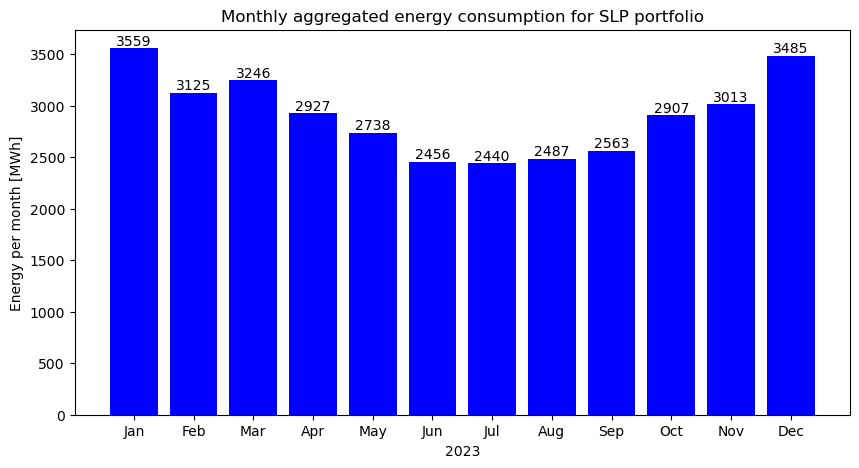

In [49]:
## Create a bar chart with the monthly aggregated energy consumption for the 35 GWh SLP portfolio 

# Aggregate daily energy consumption data by month
monthly_energy_consumption = dynamic_course_year.groupby(dynamic_course_year['Date'].dt.month)['energy_MWh_d'].sum()

# Define the names of the months
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the aggregated monthly energy consumption
plt.figure(figsize=(10, 5))
bars = plt.bar(months, monthly_energy_consumption, color='b')
plt.title('Monthly aggregated energy consumption for SLP portfolio')
plt.xlabel('2023')
plt.ylabel('Energy per month [MWh]')

# Add values on top of each bar
for bar, value in zip(bars, monthly_energy_consumption):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(value)), ha='center', va='bottom')


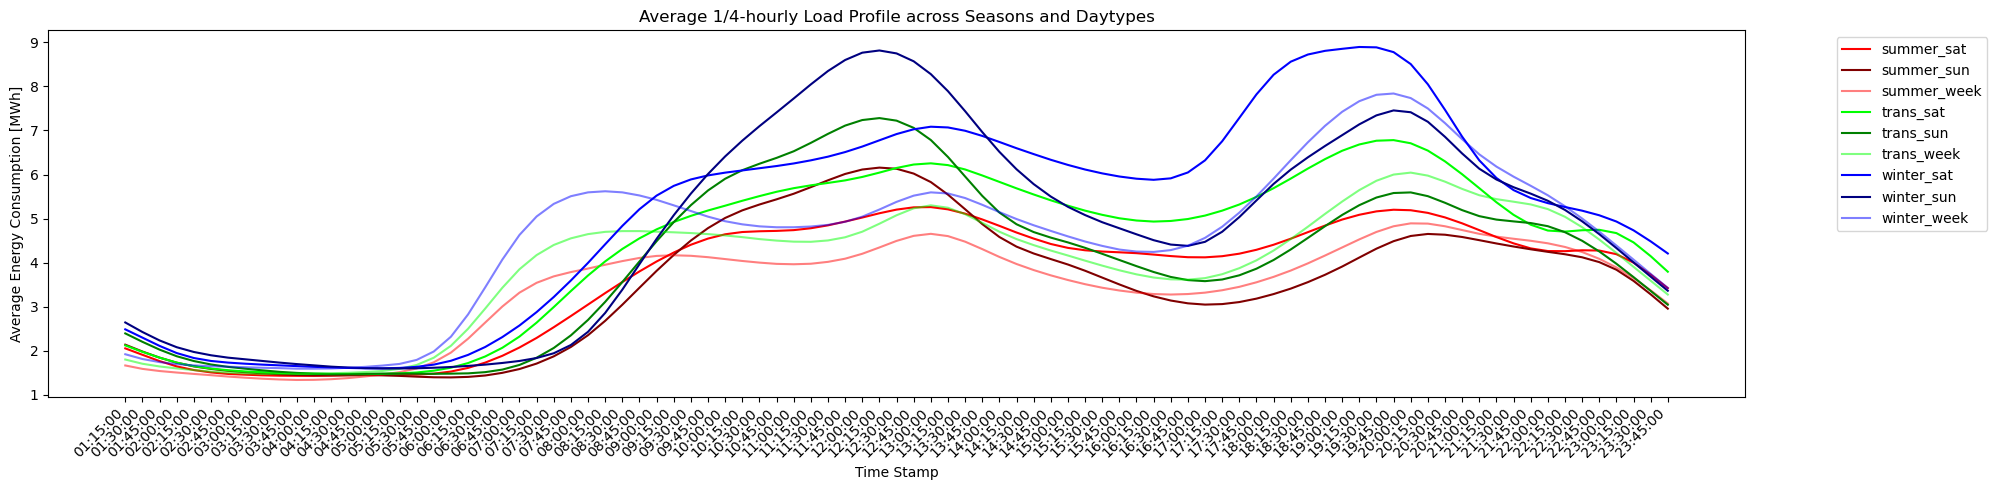

In [51]:
## Create a line chart with the average quarter-hourly load profile according to season and day type 

# Convert 'Date' column to datetime type if it's not already
dynamic_course_year['Date'] = pd.to_datetime(dynamic_course_year['Date'])

# Group by 'Season_Day' and calculate the average for each time stamp
grouped_data = dynamic_course_year.groupby('Season_Day').mean(numeric_only=True).iloc[:, 6:-1]

# Define custom colors for each category
# Summer = red
# Winter = blue 
# Transition = green 
colors = {
    'summer_week': (1, 0, 0, 0.5),  # Light Red with 50% transparency
    'winter_week': (0, 0, 1, 0.5),  # Solid Red
    'trans_week': (0, 1, 0, 0.5),   # Dark Red
    'summer_sat': (1, 0, 0, 1),     # Light Blue with 50% transparency
    'winter_sat': (0, 0, 1, 1),     # Solid Blue
    'trans_sat': (0, 1, 0, 1),      # Dark Blue
    'summer_sun': (0.5, 0, 0, 1),   # Light Blue with 50% transparency
    'winter_sun': (0, 0, 0.5, 1),   # Solid Blue
    'trans_sun': (0, 0.5, 0, 1),    # Dark Blue
}

# Plot the load profile for each category with custom colors
plt.figure(figsize=(20,5))

for season_day, data in grouped_data.iterrows():
    plt.plot(data.index, data, label=season_day, color=colors.get(season_day, 'black'))

plt.title('Average 1/4-hourly Load Profile across Seasons and Daytypes')
plt.xlabel('Time Stamp')
plt.ylabel('Average Energy Consumption [MWh]')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot

plt.tight_layout()

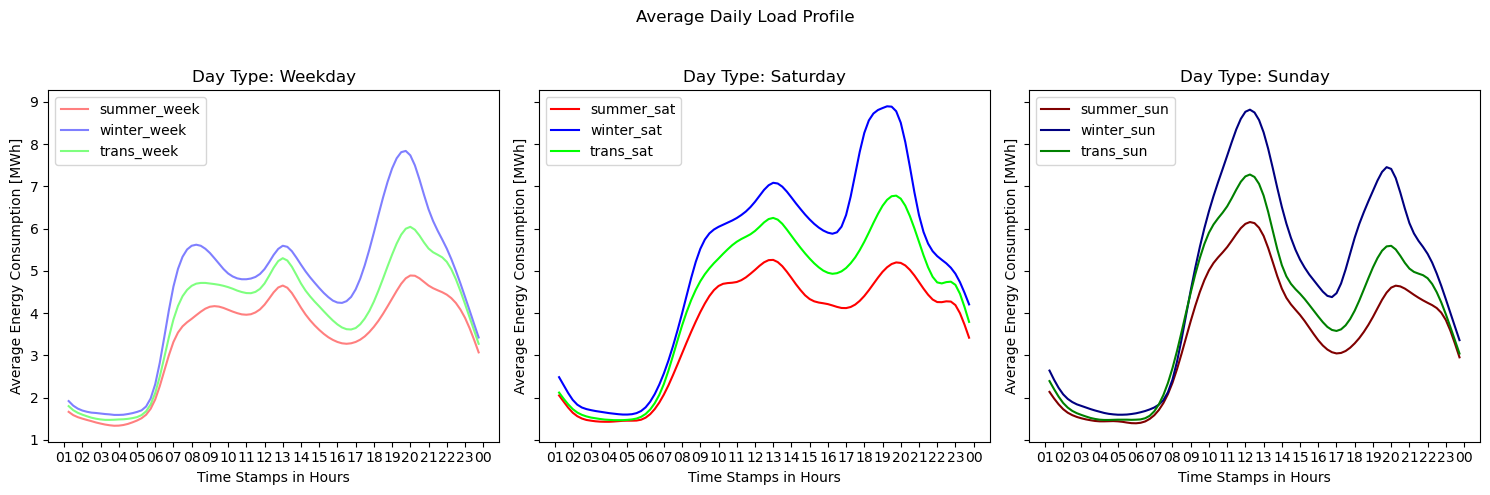

In [52]:
## Create line charts of the average hourly load profile according to season and day type 
## Displayed in a mosaic combining the individual charts   

# Convert 'Date' column to datetime type if it's not already
dynamic_course_year['Date'] = pd.to_datetime(dynamic_course_year['Date'])

# Group by 'Season_Day' and calculate the average for each time stamp
grouped_data = dynamic_course_year.groupby('Season_Day').mean(numeric_only=True).iloc[:, 6:-1]

# Define custom colors (different shades) for each category
colors = {
    'summer_week': (1, 0, 0, 0.5),
    'winter_week': (0, 0, 1, 0.5),
    'trans_week': (0, 1, 0, 0.5),
    'summer_sat': (1, 0, 0, 1),
    'winter_sat': (0, 0, 1, 1),
    'trans_sat': (0, 1, 0, 1),
    'summer_sun': (0.5, 0, 0, 1),
    'winter_sun': (0, 0, 0.5, 1),
    'trans_sun': (0, 0.5, 0, 1),
}

# Create a mosaic layout
mosaic = """
    ABC
    """

# Create a figure with constrained layout
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Average Daily Load Profile')

groups = {'Weekday': ['summer_week', 'winter_week', 'trans_week'],
          'Saturday': ['summer_sat', 'winter_sat', 'trans_sat'],
          'Sunday': ['summer_sun', 'winter_sun', 'trans_sun']}

for ax, (group_name, group_categories) in zip(axs, groups.items()):
    for season_day in group_categories:
        data = grouped_data.loc[season_day]
        # Convert index to datetime format with specified format
        data.index = pd.to_datetime(data.index, format='%H:%M:%S')
        ax.plot(data.index, data, label=season_day, color=colors.get(season_day, 'black'))

    ax.set_title(f'Day Type: {group_name}')
    ax.set_xlabel('Time Stamps in Hours')
    ax.set_ylabel('Average Energy Consumption [MWh]')
    ax.legend(loc='upper left')

    # Set custom tick locator for x-axis to show only every full hour
    ax.xaxis.set_major_locator(HourLocator(interval=1))
    ax.xaxis.set_major_formatter(DateFormatter('%H'))  # Format as hour without minutes or seconds

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the rect parameter to make room for the subtitle

### 2.2 Derivation of generation profiles of 10 MW power plants for various technologies 

#### 2.2.1 Generation profiles for renewables in 2023

In [57]:
## Starting point is the historic generation from SMARD 
## The data depict the quarter-hourly power generation by various technologies in 2023 in MWh  

# Import .csv file with actual generation  
act_gen_path = '/Users/kathringreilmeier/BewerbungsportfolioDatenanalyse/RawData/Actual_generation_2023_Quarterhour.csv'
custom_delimiter = ';' 

act_gen = pd.read_csv(act_gen_path, sep = custom_delimiter, header = 0)

print(act_gen.head(5))

          Date     Start       End Biomass [MWh] Original resolutions  \
0  Jan 1, 2023  12:00 AM  12:15 AM                           1,094.25   
1  Jan 1, 2023  12:15 AM  12:30 AM                           1,091.25   
2  Jan 1, 2023  12:30 AM  12:45 AM                           1,090.25   
3  Jan 1, 2023  12:45 AM   1:00 AM                           1,089.25   
4  Jan 1, 2023   1:00 AM   1:15 AM                           1,085.25   

   Hydropower [MWh] Original resolutions  \
0                                 320.00   
1                                 317.50   
2                                 317.25   
3                                 321.50   
4                                 315.25   

  Wind offshore [MWh] Original resolutions  \
0                                   684.25   
1                                    743.5   
2                                      817   
3                                    814.5   
4                                    785.5   

  Wind onshore [MWh

In [59]:
## Show column names to choose the relevant columns  

#Extract column names
column_names_gen = act_gen.columns

# Print the column names
print(column_names_gen)

Index(['Date', 'Start', 'End', 'Biomass [MWh] Original resolutions',
       'Hydropower [MWh] Original resolutions',
       'Wind offshore [MWh] Original resolutions',
       'Wind onshore [MWh] Original resolutions',
       'Photovoltaics [MWh] Original resolutions',
       'Other renewable [MWh] Original resolutions',
       'Nuclear [MWh] Original resolutions',
       'Lignite [MWh] Original resolutions',
       'Hard coal [MWh] Original resolutions',
       'Fossil gas [MWh] Original resolutions',
       'Hydro pumped storage [MWh] Original resolutions',
       'Other conventional [MWh] Original resolutions'],
      dtype='object')


In [61]:
## Keep only the desired columns 

# Define the desired columns to keep
desired_columns_gen = ['Date', 'Start', 'End', 'Wind offshore [MWh] Original resolutions', 'Wind onshore [MWh] Original resolutions', 'Photovoltaics [MWh] Original resolutions']

# Keep only the desired columns - variable renewables - in a new data frame
act_gen_re = act_gen[desired_columns_gen]

# Print the first few rows to verify the right set up of the data frame 
print(act_gen_re.head())

# Print the data types to ensure that you can perform the calculations in the following 
print(act_gen_re.dtypes)

          Date     Start       End Wind offshore [MWh] Original resolutions  \
0  Jan 1, 2023  12:00 AM  12:15 AM                                   684.25   
1  Jan 1, 2023  12:15 AM  12:30 AM                                    743.5   
2  Jan 1, 2023  12:30 AM  12:45 AM                                      817   
3  Jan 1, 2023  12:45 AM   1:00 AM                                    814.5   
4  Jan 1, 2023   1:00 AM   1:15 AM                                    785.5   

  Wind onshore [MWh] Original resolutions  \
0                                7,145.75   
1                                7,158.25   
2                                7,302.25   
3                                7,104.25   
4                                   7,322   

  Photovoltaics [MWh] Original resolutions  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                            

In [63]:
## Adjust the data types to perform mathematical operations with these columns

# Convert columns to strings and replace commas
act_gen_re.loc[:, 'Wind offshore [MWh] Original resolutions'] = act_gen_re['Wind offshore [MWh] Original resolutions'].astype(str).str.replace(',', '')
act_gen_re.loc[:, 'Wind onshore [MWh] Original resolutions'] = act_gen_re['Wind onshore [MWh] Original resolutions'].astype(str).str.replace(',', '')
act_gen_re.loc[:, 'Photovoltaics [MWh] Original resolutions'] = act_gen_re['Photovoltaics [MWh] Original resolutions'].astype(str).str.replace(',', '')

# Convert columns to numeric
act_gen_re.loc[:, 'Wind offshore [MWh] Original resolutions'] = pd.to_numeric(act_gen_re['Wind offshore [MWh] Original resolutions'], errors='coerce')
act_gen_re.loc[:, 'Wind onshore [MWh] Original resolutions'] = pd.to_numeric(act_gen_re['Wind onshore [MWh] Original resolutions'], errors='coerce')
act_gen_re.loc[:, 'Photovoltaics [MWh] Original resolutions'] = pd.to_numeric(act_gen_re['Photovoltaics [MWh] Original resolutions'], errors='coerce')

# Rename the columns using a dictionary
act_gen_re.rename(
    columns={
        'Wind offshore [MWh] Original resolutions': 'W_Off_gen_MWh',
        'Wind onshore [MWh] Original resolutions': 'W_On_gen_MWh',
        'Photovoltaics [MWh] Original resolutions': 'PV_gen_MWh'
    },
    inplace=True  # This updates the DataFrame in place
)

print(act_gen_re.head())

print(act_gen_re.dtypes) 

          Date     Start       End W_Off_gen_MWh W_On_gen_MWh PV_gen_MWh
0  Jan 1, 2023  12:00 AM  12:15 AM        684.25      7145.75        0.0
1  Jan 1, 2023  12:15 AM  12:30 AM         743.5      7158.25        0.0
2  Jan 1, 2023  12:30 AM  12:45 AM         817.0      7302.25        0.0
3  Jan 1, 2023  12:45 AM   1:00 AM         814.5      7104.25        0.0
4  Jan 1, 2023   1:00 AM   1:15 AM         785.5       7322.0        0.0
Date             object
Start            object
End              object
W_Off_gen_MWh    object
W_On_gen_MWh     object
PV_gen_MWh       object
dtype: object


In [65]:
# Copy the DataFrame to avoid SettingWithCopyWarning
act_gen_re_copy = act_gen_re.copy()

# Convert 'Date' from object to datetime
act_gen_re_copy['Date'] = pd.to_datetime(
    act_gen_re_copy['Date'], format='%b %d, %Y', errors='coerce'
)

# Correct conversion for 'Start' and 'End' from 12-hour to 24-hour format
act_gen_re_copy['Start'] = pd.to_datetime(
    act_gen_re_copy['Start'], format='%I:%M %p', errors='coerce'
).dt.time

act_gen_re_copy['End'] = pd.to_datetime(
    act_gen_re_copy['End'], format='%I:%M %p', errors='coerce'
).dt.time

# Convert numerical columns to float
float_cols = ['W_Off_gen_MWh', 'W_On_gen_MWh', 'PV_gen_MWh']

for col in float_cols:
    act_gen_re_copy[col] = pd.to_numeric(act_gen_re_copy[col], errors='coerce')

# Display the first few rows of the updated DataFrame
print(act_gen_re_copy.head())

# Display the data types to confirm conversions
print(act_gen_re_copy.dtypes)

# Check for invalid 'Start' and 'End' times
invalid_start = act_gen_re_copy['Start'].isnull().sum()
invalid_end = act_gen_re_copy['End'].isnull().sum()

print("Invalid 'Start' times:", invalid_start)
print("Invalid 'End' times:", invalid_end)

        Date     Start       End  W_Off_gen_MWh  W_On_gen_MWh  PV_gen_MWh
0 2023-01-01  00:00:00  00:15:00         684.25       7145.75         0.0
1 2023-01-01  00:15:00  00:30:00         743.50       7158.25         0.0
2 2023-01-01  00:30:00  00:45:00         817.00       7302.25         0.0
3 2023-01-01  00:45:00  01:00:00         814.50       7104.25         0.0
4 2023-01-01  01:00:00  01:15:00         785.50       7322.00         0.0
Date             datetime64[ns]
Start                    object
End                      object
W_Off_gen_MWh           float64
W_On_gen_MWh            float64
PV_gen_MWh              float64
dtype: object
Invalid 'Start' times: 0
Invalid 'End' times: 0


In [67]:
## Starting point is the installed capacity from SMARD 
## The data depicts the installed capacity for various technologies in 2023 in MW  

# Import .csv file with installed capacity
inst_cap_path = '/Users/kathringreilmeier/BewerbungsportfolioDatenanalyse/RawData/Installierte_Erzeugungsleistung_202204180000_202404180000_Jahr.csv'
custom_delimiter = ';' 

inst_cap_re = pd.read_csv(inst_cap_path, sep = custom_delimiter, header = 0)

print(inst_cap_re)

# Show the data types of the columns 
print(inst_cap_re.dtypes)

   Jahr Wind Offshore [MW] Originalauflösungen  \
0  2023                               8.129,00   

  Wind Onshore [MW] Originalauflösungen  \
0                             57.590,00   

  Photovoltaik [MW] Originalauflösungen,,,  
0                                63.066,00  
Jahr                                         int64
Wind Offshore [MW] Originalauflösungen      object
Wind Onshore [MW] Originalauflösungen       object
Photovoltaik [MW] Originalauflösungen,,,    object
dtype: object


In [69]:
## Format the data frame (rename columns and change data types) 

inst_cap_re_copy = pd.DataFrame(inst_cap_re)

# Verify current column names
print("Current column names:", inst_cap_re_copy.columns)

# Rename the columns
rename_mapping = {
    'Jahr': 'Year', 
    'Wind Offshore [MW] Originalauflösungen': 'W_Off_cap_MW',
    'Wind Onshore [MW] Originalauflösungen': 'W_On_cap_MW',
    'Photovoltaik [MW] Originalauflösungen,,,': 'PV_cap_MW'
}

inst_cap_re_copy.rename(columns=rename_mapping, inplace=True)

# Verify the rename operation
print("Updated column names:", inst_cap_re_copy.columns)

# Convert the columns to float after replacing the correct characters
# Define a function to convert European-style numbers to float
def european_to_float(value):
    if isinstance(value, str):
        return float(value.replace('.', '').replace(',', '.'))
    return value

columns_to_transform = ['W_Off_cap_MW', 'W_On_cap_MW', 'PV_cap_MW']

# Convert these columns to float
for col in columns_to_transform:
    if col in inst_cap_re_copy.columns:  # Check if column exists to avoid KeyError
        inst_cap_re_copy[col] = inst_cap_re_copy[col].astype(str).apply(european_to_float)

# Display the DataFrame to ensure correct transformations
print(inst_cap_re_copy)
print(inst_cap_re_copy.dtypes)

Current column names: Index(['Jahr', 'Wind Offshore [MW] Originalauflösungen',
       'Wind Onshore [MW] Originalauflösungen',
       'Photovoltaik [MW] Originalauflösungen,,,'],
      dtype='object')
Updated column names: Index(['Year', 'W_Off_cap_MW', 'W_On_cap_MW', 'PV_cap_MW'], dtype='object')
   Year  W_Off_cap_MW  W_On_cap_MW  PV_cap_MW
0  2023        8129.0      57590.0    63066.0
Year              int64
W_Off_cap_MW    float64
W_On_cap_MW     float64
PV_cap_MW       float64
dtype: object


In [71]:
## Further format data frame 

act_gen_re_copy = pd.DataFrame(act_gen_re_copy)
inst_cap_re_copy = pd.DataFrame(inst_cap_re_copy)

# Extract the year from the 'Date' column and create a new column 'Year'
act_gen_re_copy['Year'] = pd.to_datetime(act_gen_re_copy['Date']).dt.year

# Merge 'act_gen_re_copy' and 'inst_cap_re_copy' based on 'Year'
gen_cap_re = pd.merge(act_gen_re_copy, inst_cap_re_copy, on='Year', how='left')

# Drop the 'Year' column from the merged DataFrame
gen_cap_re.drop('Year', axis=1, inplace=True)  # Set inplace=True to avoid reassigning

# Display the merged DataFrame
display(gen_cap_re)

,Date,Start,End,W_Off_gen_MWh,W_On_gen_MWh,PV_gen_MWh,W_Off_cap_MW,W_On_cap_MW,PV_cap_MW
0,2023-01-01,00:00:00,00:15:00,684.25,7145.75,0.0,8129.0,57590.0,63066.0
1,2023-01-01,00:15:00,00:30:00,743.50,7158.25,0.0,8129.0,57590.0,63066.0
2,2023-01-01,00:30:00,00:45:00,817.00,7302.25,0.0,8129.0,57590.0,63066.0
3,2023-01-01,00:45:00,01:00:00,814.50,7104.25,0.0,8129.0,57590.0,63066.0
4,2023-01-01,01:00:00,01:15:00,785.50,7322.00,0.0,8129.0,57590.0,63066.0
...,...,...,...,...,...,...,...,...,...
35035,2023-12-31,22:45:00,23:00:00,1546.25,7527.25,0.0,8129.0,57590.0,63066.0
35036,2023-12-31,23:00:00,23:15:00,1515.50,7535.00,0.0,8129.0,57590.0,63066.0
35037,2023-12-31,23:15:00,23:30:00,1499.75,7495.00,0.0,8129.0,57590.0,63066.0
35038,2023-12-31,23:30:00,23:45:00,1479.25,7544.25,0.0,8129.0,57590.0,63066.0


In [73]:
## Downscale national values to desired plant size 

# Define plant capacity in MW 
plant_capacity = 10

# Calculate quarter-hourly generation for each technology in MWh  
gen_cap_re['W_Off_gen_10MWcap'] = gen_cap_re['W_Off_gen_MWh'] / gen_cap_re['W_Off_cap_MW'] * plant_capacity 
gen_cap_re['W_On_gen_10MWcap'] = gen_cap_re['W_On_gen_MWh'] / gen_cap_re['W_On_cap_MW'] * plant_capacity 
gen_cap_re['PV_gen_10MWcap'] = gen_cap_re['PV_gen_MWh'] / gen_cap_re['PV_cap_MW'] * plant_capacity 

# Display the updated dataframe
print(gen_cap_re.head())

        Date     Start       End  W_Off_gen_MWh  W_On_gen_MWh  PV_gen_MWh  \
0 2023-01-01  00:00:00  00:15:00         684.25       7145.75         0.0   
1 2023-01-01  00:15:00  00:30:00         743.50       7158.25         0.0   
2 2023-01-01  00:30:00  00:45:00         817.00       7302.25         0.0   
3 2023-01-01  00:45:00  01:00:00         814.50       7104.25         0.0   
4 2023-01-01  01:00:00  01:15:00         785.50       7322.00         0.0   

   W_Off_cap_MW  W_On_cap_MW  PV_cap_MW  W_Off_gen_10MWcap  W_On_gen_10MWcap  \
0        8129.0      57590.0    63066.0           0.841739          1.240797   
1        8129.0      57590.0    63066.0           0.914627          1.242968   
2        8129.0      57590.0    63066.0           1.005044          1.267972   
3        8129.0      57590.0    63066.0           1.001968          1.233591   
4        8129.0      57590.0    63066.0           0.966294          1.271401   

   PV_gen_10MWcap  
0             0.0  
1             0.

In [75]:
## Create a column season to display classified results in charts 

# Apply the function to create a new column 'Season'
gen_cap_re['Season'] = gen_cap_re['Date'].apply(classify_season)

# Display the updated dataframe
print(gen_cap_re)

            Date     Start       End  W_Off_gen_MWh  W_On_gen_MWh  PV_gen_MWh  \
0     2023-01-01  00:00:00  00:15:00         684.25       7145.75         0.0   
1     2023-01-01  00:15:00  00:30:00         743.50       7158.25         0.0   
2     2023-01-01  00:30:00  00:45:00         817.00       7302.25         0.0   
3     2023-01-01  00:45:00  01:00:00         814.50       7104.25         0.0   
4     2023-01-01  01:00:00  01:15:00         785.50       7322.00         0.0   
...          ...       ...       ...            ...           ...         ...   
35035 2023-12-31  22:45:00  23:00:00        1546.25       7527.25         0.0   
35036 2023-12-31  23:00:00  23:15:00        1515.50       7535.00         0.0   
35037 2023-12-31  23:15:00  23:30:00        1499.75       7495.00         0.0   
35038 2023-12-31  23:30:00  23:45:00        1479.25       7544.25         0.0   
35039 2023-12-31  23:45:00  00:00:00        1469.00       7480.50         0.0   

       W_Off_cap_MW  W_On_c

In [76]:
## Format data types 

gen_cap_re = pd.DataFrame(gen_cap_re)

# Convert 'Date' to datetime
gen_cap_re['Date'] = pd.to_datetime(gen_cap_re['Date'])

# Convert 'Start' and 'End' to datetime with 24-hour format
gen_cap_re['Start'] = pd.to_datetime(gen_cap_re['Start'], format='%H:%M:%S', errors='coerce').dt.time
gen_cap_re['End'] = pd.to_datetime(gen_cap_re['End'], format='%H:%M:%S', errors='coerce').dt.time

# Extract the hour and minute
gen_cap_re['Hour'] = pd.to_datetime(gen_cap_re['Start'].astype(str), format='%H:%M:%S', errors='coerce').dt.hour
gen_cap_re['Minute'] = pd.to_datetime(gen_cap_re['Start'].astype(str), format='%H:%M:%S', errors='coerce').dt.minute

print(gen_cap_re)

print(gen_cap_re.dtypes)

            Date     Start       End  W_Off_gen_MWh  W_On_gen_MWh  PV_gen_MWh  \
0     2023-01-01  00:00:00  00:15:00         684.25       7145.75         0.0   
1     2023-01-01  00:15:00  00:30:00         743.50       7158.25         0.0   
2     2023-01-01  00:30:00  00:45:00         817.00       7302.25         0.0   
3     2023-01-01  00:45:00  01:00:00         814.50       7104.25         0.0   
4     2023-01-01  01:00:00  01:15:00         785.50       7322.00         0.0   
...          ...       ...       ...            ...           ...         ...   
35035 2023-12-31  22:45:00  23:00:00        1546.25       7527.25         0.0   
35036 2023-12-31  23:00:00  23:15:00        1515.50       7535.00         0.0   
35037 2023-12-31  23:15:00  23:30:00        1499.75       7495.00         0.0   
35038 2023-12-31  23:30:00  23:45:00        1479.25       7544.25         0.0   
35039 2023-12-31  23:45:00  00:00:00        1469.00       7480.50         0.0   

       W_Off_cap_MW  W_On_c

#### 2.2.2 Graphic representation of generation profiles  

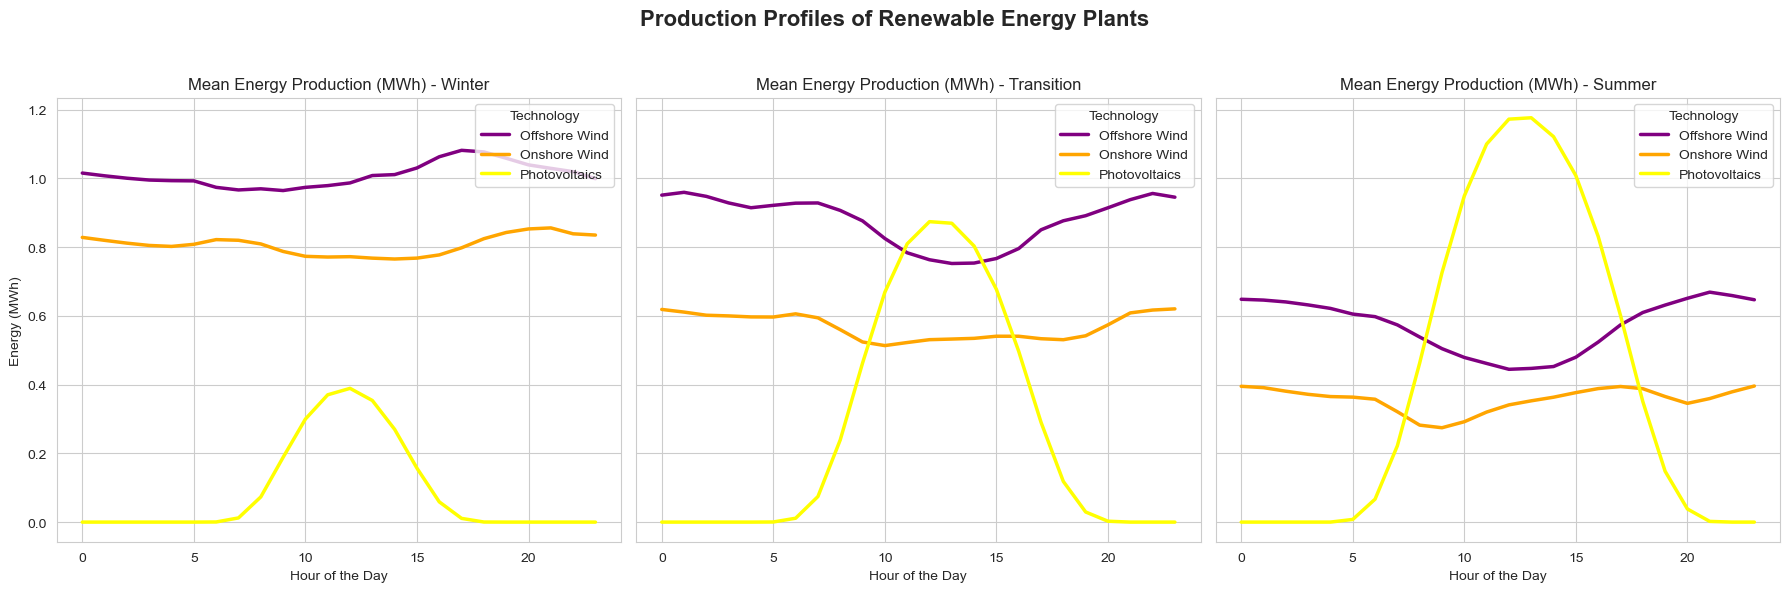

In [78]:
## Display line charts with daily production profiles of different technologies 
## Mosaic with chart for each season 

# Set a consistent style for the plots
sns.set_style("whitegrid")

# Define the seasons to plot
seasons = ['Winter', 'Transition', 'Summer']

# Group the data by 'Season', 'Hour', and technology to calculate the mean
grouped_data = gen_cap_re.groupby(['Season', 'Hour'])[['W_Off_gen_10MWcap', 'W_On_gen_10MWcap', 'PV_gen_10MWcap']].mean().reset_index()

# Create a plot with subplots for each season
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Ensure axes is a 1D array for consistency
axes = axes.flatten()

# Loop through the seasons to create the plots
for ax, season in zip(axes, seasons):
    # Filter the data for the current season
    season_data = grouped_data[grouped_data['Season'] == season]
    
    # Plot each line for the different technologies
    sns.lineplot(data=season_data, x='Hour', y='W_Off_gen_10MWcap', ax=ax, label='Offshore Wind', color='purple', linewidth=2.5)
    sns.lineplot(data=season_data, x='Hour', y='W_On_gen_10MWcap', ax=ax, label='Onshore Wind', color='orange', linewidth=2.5)
    sns.lineplot(data=season_data, x='Hour', y='PV_gen_10MWcap', ax=ax, label='Photovoltaics', color='yellow', linewidth=2.5)
    
    # Set plot titles and labels
    ax.set_title(f'Mean Energy Production (MWh) - {season}')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Energy (MWh)')
    
    # Adjust legend position for clarity
    ax.legend(title='Technology', loc='upper right')

# Add an overall title for the entire figure
fig.suptitle("Production Profiles of Renewable Energy Plants", fontsize=16, fontweight='bold')

# Adjust the top margin to avoid overlapping with the title
fig.subplots_adjust(top=0.85)

# Align layout for consistent visuals
plt.tight_layout(rect=[0, 0, 1, 0.95])  # This helps align the layout without affecting the title

### 2.3 Comparison of the household load profile with the respective generation profiles 

#### 2.3.1 Merge dataframes for dynamic household stanard load profile and generation profile 

In [81]:
print(dynamic_course_year)

          Date  DayNumber    DayName      DayType  Season   Season_Day  \
0   2023-01-01          1     Sunday  pub_hol_sun  Winter   winter_sun   
1   2023-01-02          2     Monday      weekday  Winter  winter_week   
2   2023-01-03          3    Tuesday      weekday  Winter  winter_week   
3   2023-01-04          4  Wednesday      weekday  Winter  winter_week   
4   2023-01-05          5   Thursday      weekday  Winter  winter_week   
..         ...        ...        ...          ...     ...          ...   
360 2023-12-27        361  Wednesday      weekday  Winter  winter_week   
361 2023-12-28        362   Thursday      weekday  Winter  winter_week   
362 2023-12-29        363     Friday      weekday  Winter  winter_week   
363 2023-12-30        364   Saturday  weekend_sat  Winter   winter_sat   
364 2023-12-31        365     Sunday  pub_hol_sat  Winter   winter_sat   

     00:00:00  00:15:00  00:30:00  00:45:00  ...  21:45:00  22:00:00  \
0    3.182004  3.803625  3.525417  3.26

In [82]:
## Transform the data frame into a long format 

# Identify the columns with time stamps (all columns with ':')
time_columns = [col for col in dynamic_course_year.columns if ':' in col]

# Columns to keep as identifiers
id_columns = ['Date', 'DayNumber', 'DayName', 'DayType', 'Season', 'Season_Day']

# Melt the DataFrame to switch to long format
dynamic_SLP = pd.melt(
    dynamic_course_year,
    id_vars=id_columns,  # Keep these columns as identifiers
    value_vars=time_columns,  # Columns to transpose
    var_name='Time',  # New column name for time stamps
    value_name='quarter_h_SLP_MW'  # New column name for values
)

# Convert the 'Time' column to datetime.time for sorting
dynamic_SLP['Time'] = pd.to_datetime(dynamic_SLP['Time'], format='%H:%M:%S').dt.time

# Sort by 'Date' first, then by 'Time'
dynamic_SLP.sort_values(by=['Date', 'Time'], inplace=True)

# Reset the index after sorting
dynamic_SLP.reset_index(drop=True, inplace=True)

# Display the first few rows of the sorted, transposed DataFrame
print(dynamic_SLP.head())

        Date  DayNumber DayName      DayType  Season  Season_Day      Time  \
0 2023-01-01          1  Sunday  pub_hol_sun  Winter  winter_sun  00:00:00   
1 2023-01-01          1  Sunday  pub_hol_sun  Winter  winter_sun  00:15:00   
2 2023-01-01          1  Sunday  pub_hol_sun  Winter  winter_sun  00:30:00   
3 2023-01-01          1  Sunday  pub_hol_sun  Winter  winter_sun  00:45:00   
4 2023-01-01          1  Sunday  pub_hol_sun  Winter  winter_sun  01:00:00   

   quarter_h_SLP_MW  
0          3.182004  
1          3.803625  
2          3.525417  
3          3.260250  
4          3.003777  


In [83]:
print(gen_cap_re.head())

        Date     Start       End  W_Off_gen_MWh  W_On_gen_MWh  PV_gen_MWh  \
0 2023-01-01  00:00:00  00:15:00         684.25       7145.75         0.0   
1 2023-01-01  00:15:00  00:30:00         743.50       7158.25         0.0   
2 2023-01-01  00:30:00  00:45:00         817.00       7302.25         0.0   
3 2023-01-01  00:45:00  01:00:00         814.50       7104.25         0.0   
4 2023-01-01  01:00:00  01:15:00         785.50       7322.00         0.0   

   W_Off_cap_MW  W_On_cap_MW  PV_cap_MW  W_Off_gen_10MWcap  W_On_gen_10MWcap  \
0        8129.0      57590.0    63066.0           0.841739          1.240797   
1        8129.0      57590.0    63066.0           0.914627          1.242968   
2        8129.0      57590.0    63066.0           1.005044          1.267972   
3        8129.0      57590.0    63066.0           1.001968          1.233591   
4        8129.0      57590.0    63066.0           0.966294          1.271401   

   PV_gen_10MWcap  Season  Hour  Minute  
0             

In [84]:
# Merge the dataframes

gen_con = pd.merge(dynamic_SLP, gen_cap_re, left_on=['Date', 'Time'], right_on=['Date', 'Start'], how='left')

print(gen_con.head())

        Date  DayNumber DayName      DayType Season_x  Season_Day      Time  \
0 2023-01-01          1  Sunday  pub_hol_sun   Winter  winter_sun  00:00:00   
1 2023-01-01          1  Sunday  pub_hol_sun   Winter  winter_sun  00:15:00   
2 2023-01-01          1  Sunday  pub_hol_sun   Winter  winter_sun  00:30:00   
3 2023-01-01          1  Sunday  pub_hol_sun   Winter  winter_sun  00:45:00   
4 2023-01-01          1  Sunday  pub_hol_sun   Winter  winter_sun  01:00:00   

   quarter_h_SLP_MW     Start       End  ...  PV_gen_MWh  W_Off_cap_MW  \
0          3.182004  00:00:00  00:15:00  ...         0.0        8129.0   
1          3.803625  00:15:00  00:30:00  ...         0.0        8129.0   
2          3.525417  00:30:00  00:45:00  ...         0.0        8129.0   
3          3.260250  00:45:00  01:00:00  ...         0.0        8129.0   
4          3.003777  01:00:00  01:15:00  ...         0.0        8129.0   

   W_On_cap_MW  PV_cap_MW  W_Off_gen_10MWcap  W_On_gen_10MWcap  \
0      57590.0

In [85]:
## Keep only the desired columns 

# Define the desired columns to keep
desired_columns_gen_con = ['Date', 'DayNumber', 'DayName', 'DayType','Season_x', 'Season_Day', 'Hour', 'Minute','quarter_h_SLP_MW','W_Off_gen_10MWcap', 'W_On_gen_10MWcap', 'PV_gen_10MWcap']

# Keep only the desired columns - variable renewables - in a new data frame
gen_con_merge = gen_con[desired_columns_gen_con]

# Use .loc to avoid SettingWithCopyWarning
gen_con_merge.loc[:, ['W_Off_gen_10MWcap', 'W_On_gen_10MWcap', 'PV_gen_10MWcap']] = gen_con_merge.loc[:, ['W_Off_gen_10MWcap', 'W_On_gen_10MWcap', 'PV_gen_10MWcap']].apply(pd.to_numeric, errors='coerce')

# After conversion, ensure missing values are handled appropriately
gen_con_merge.fillna(0, inplace=True)

# Print the first few rows to verify the right set up of the data frame 
print(gen_con_merge.head())
print(gen_con_merge.dtypes)


        Date  DayNumber DayName      DayType Season_x  Season_Day  Hour  \
0 2023-01-01          1  Sunday  pub_hol_sun   Winter  winter_sun   0.0   
1 2023-01-01          1  Sunday  pub_hol_sun   Winter  winter_sun   0.0   
2 2023-01-01          1  Sunday  pub_hol_sun   Winter  winter_sun   0.0   
3 2023-01-01          1  Sunday  pub_hol_sun   Winter  winter_sun   0.0   
4 2023-01-01          1  Sunday  pub_hol_sun   Winter  winter_sun   1.0   

   Minute  quarter_h_SLP_MW  W_Off_gen_10MWcap  W_On_gen_10MWcap  \
0     0.0          3.182004           0.841739          1.240797   
1    15.0          3.803625           0.914627          1.242968   
2    30.0          3.525417           1.005044          1.267972   
3    45.0          3.260250           1.001968          1.233591   
4     0.0          3.003777           0.966294          1.271401   

   PV_gen_10MWcap  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
Date                

#### 2.3.2 Graphic illustration of generation and consumption profiles 

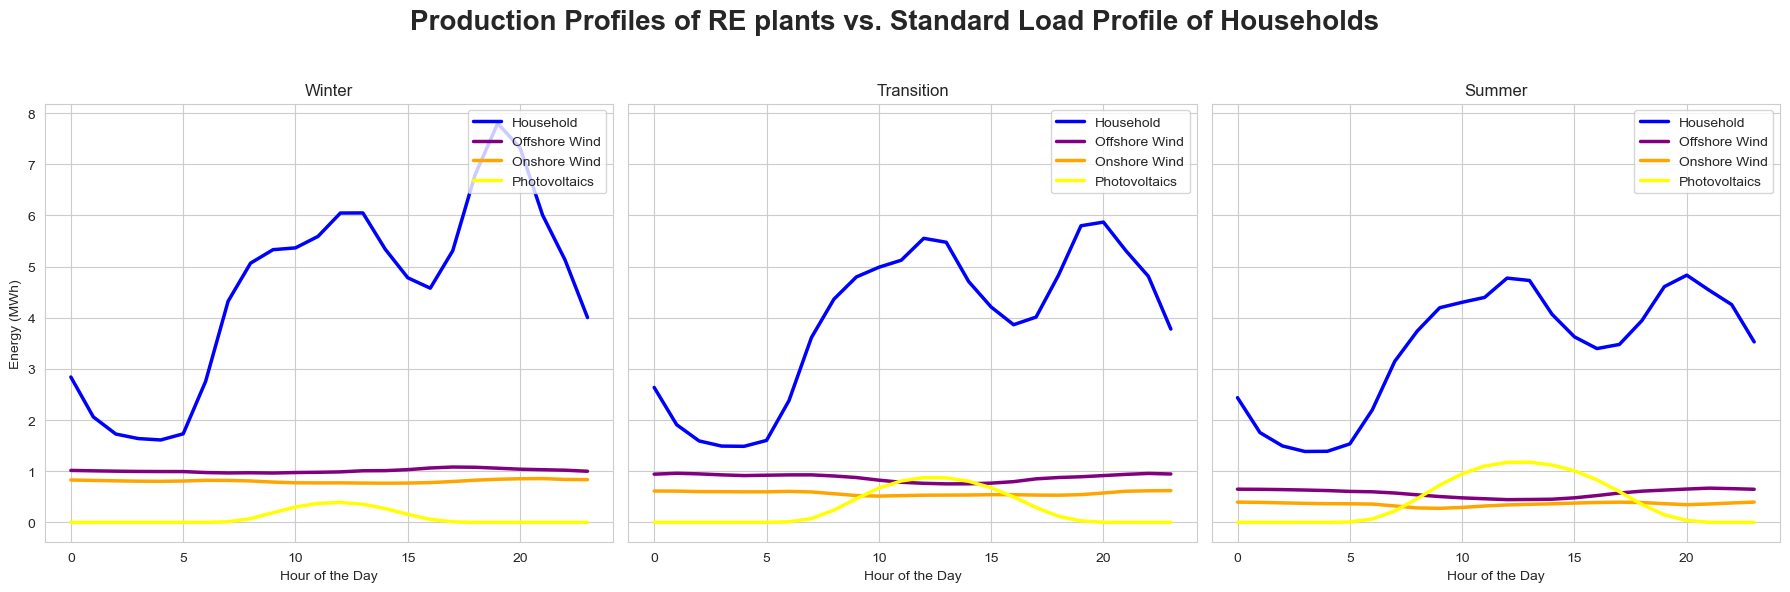

In [87]:
## Line charts with average production profiles of RE plants vs. SLP of households 
## Mosaic with chart for each season 

# Set a consistent style for the plots
sns.set_style("whitegrid")

# Define the seasons to plot
seasons = ['Winter', 'Transition', 'Summer']

# Group the data by 'Season', 'Hour', and technology to calculate the mean
grouped_data = gen_con_merge.groupby(['Season_x', 'Hour'])[['quarter_h_SLP_MW','W_Off_gen_10MWcap', 'W_On_gen_10MWcap', 'PV_gen_10MWcap']].mean().reset_index()

# Create a plot with subplots for each season
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Ensure axes is a 1D array for consistency
axes = axes.flatten()

# Loop through the seasons to create the plots
for ax, season in zip(axes, seasons):
    # Filter the data for the current season
    season_data = grouped_data[grouped_data['Season_x'] == season]
    
    # Plot each line for the different technologies
    sns.lineplot(data=season_data, x='Hour', y='quarter_h_SLP_MW', ax=ax, label='Household', color='blue', linewidth=2.5)
    sns.lineplot(data=season_data, x='Hour', y='W_Off_gen_10MWcap', ax=ax, label='Offshore Wind', color='purple', linewidth=2.5)
    sns.lineplot(data=season_data, x='Hour', y='W_On_gen_10MWcap', ax=ax, label='Onshore Wind', color='orange', linewidth=2.5)
    sns.lineplot(data=season_data, x='Hour', y='PV_gen_10MWcap', ax=ax, label='Photovoltaics', color='yellow', linewidth=2.5)
    
    # Set plot titles and labels
    ax.set_title(f'{season}')
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Energy (MWh)')
    
    # Adjust legend position for clarity
    ax.legend(title='', loc='upper right')

# Add an overall title for the entire figure
fig.suptitle("Production Profiles of RE plants vs. Standard Load Profile of Households", fontsize=20, fontweight='bold')

# Adjust the top margin to avoid overlapping with the title
fig.subplots_adjust(top=0.85)

# Align layout for consistent visuals
plt.tight_layout(rect=[0, 0, 1, 0.95])  # This helps align the layout without affecting the title